In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import gc

In [2]:
Train_dir = "C:\\Users\\Admin\\Desktop\\image"


In [3]:
train_mild = ["C:\\Users\\Admin\\Desktop\\image\\{}".format(i) for i in os.listdir(Train_dir) if 'mild' in i]
train_mod = ["C:\\Users\\Admin\\Desktop\\image\\{}".format(i) for i in os.listdir(Train_dir) if 'mod' in i]
train_norm = ["C:\\Users\\Admin\\Desktop\\image\\{}".format(i) for i in os.listdir(Train_dir) if 'norm' in i]
train_prolif = ["C:\\Users\\Admin\\Desktop\\image\\{}".format(i) for i in os.listdir(Train_dir) if 'prolif' in i]
train_severe = ["C:\\Users\\Admin\\Desktop\\image\\{}".format(i) for i in os.listdir(Train_dir) if 'severe' in i]
#test_imgs = ["E:\\test\\{}".format(i) for i in os.listdir(Train_dir)]

train_imgs = train_mild+train_mod+train_norm+train_prolif+train_severe 
random.shuffle(train_imgs)


In [4]:
print (len(train_norm))
print (len(train_severe ))
print (len(train_mild))
print (len(train_mod ))
print(len(train_prolif))
print(len(train_imgs))

70
70
70
70
70
350


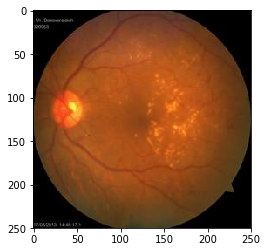

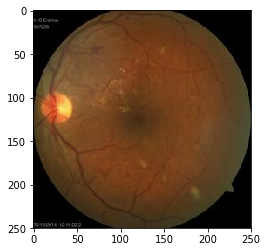

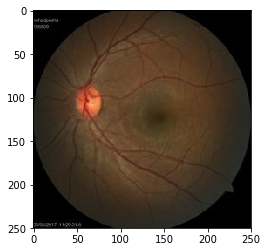

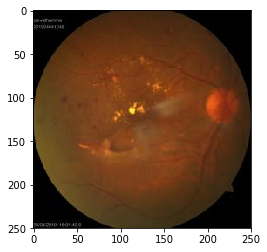

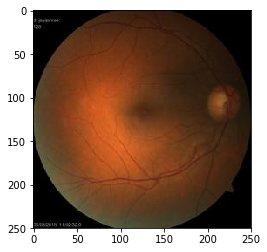

In [5]:
import matplotlib.image as mpimg
for ima in train_imgs[0:5]:
    img=mpimg.imread(ima)
    imgplot=plt.imshow(img)
    plt.show()

In [6]:
nrows = 250
ncolumns = 250
channels = 3

In [8]:
X = []
y = []

for image in train_imgs:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation= cv2.INTER_CUBIC))
    if 'mild' in  image:
        y.append([0,0,0,0,1])
        
    if 'mod' in image:
        y.append([0,0,0,1,0])
        
    if 'norm' in  image:
        y.append([0,0,1,0,0])
        
    if 'prolif' in image:
        y.append([0,1,0,0,0])
        
    if 'severe' in  image:
        y.append([1,0,0,0,0])
        
        
    

In [9]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(350, 250, 250, 3)
(350, 5)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2, random_state=2)

In [11]:
ntrain = len(X_train)
nval = len(X_val)

batchsize = 16


In [12]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (250,250,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 5, activation = 'sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 128)       147584    
__________

In [18]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
        
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batchsize)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batchsize)
#len(train_generator)
history = model.fit_generator(train_generator,
                         steps_per_epoch =ntrain // batchsize,
                         epochs = 25,
                         validation_data = val_generator,
                         validation_steps =nval // batchsize)

Epoch 1/25
17/17 [==============================] - 89s 5s/step - loss: 0.5316 - acc: 0.7809 - val_loss: 0.5054 - val_acc: 0.8000
Epoch 2/25
17/17 [==============================] - 68s 4s/step - loss: 0.5099 - acc: 0.8000 - val_loss: 0.4858 - val_acc: 0.8000
Epoch 3/25
17/17 [==============================] - 70s 4s/step - loss: 0.4998 - acc: 0.8000 - val_loss: 0.4785 - val_acc: 0.8000
Epoch 4/25
17/17 [==============================] - 70s 4s/step - loss: 0.4888 - acc: 0.8000 - val_loss: 0.4610 - val_acc: 0.8000
Epoch 5/25
17/17 [==============================] - 70s 4s/step - loss: 0.4871 - acc: 0.8000 - val_loss: 0.4459 - val_acc: 0.8000
Epoch 6/25
17/17 [==============================] - 69s 4s/step - loss: 0.4739 - acc: 0.8081 - val_loss: 0.4366 - val_acc: 0.8375
Epoch 7/25
17/17 [==============================] - 70s 4s/step - loss: 0.4627 - acc: 0.8117 - val_loss: 0.4390 - val_acc: 0.8370
Epoch 8/25
17/17 [==============================] - 68s 4s/step - loss: 0.4724 - acc: 0.81

In [21]:
model.save_weights('model_weights.h5')
model.save('diabetes.h5')

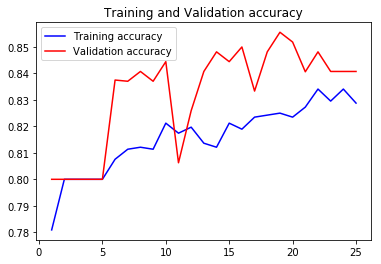

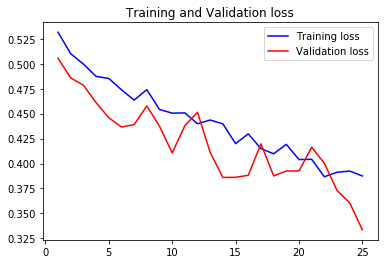

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()